# Linear Regression Project
Analyze the customer data from a made-up ecommerce company that sells clothing online. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [4]:
df = pd.read_csv("15-Ecommerce Customers")

In [5]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

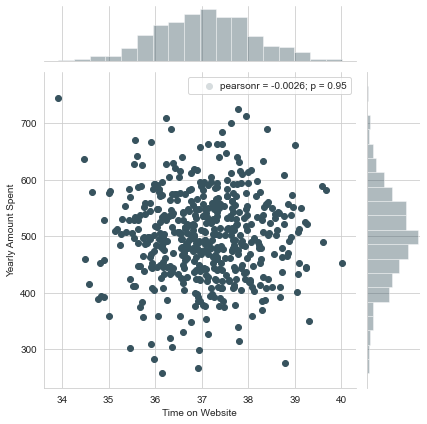

In [9]:
jointplot1 = sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=df, kind='scatter')
jointplot1.annotate(scipy.stats.pearsonr)

** Do the same but with the Time on App column instead. **

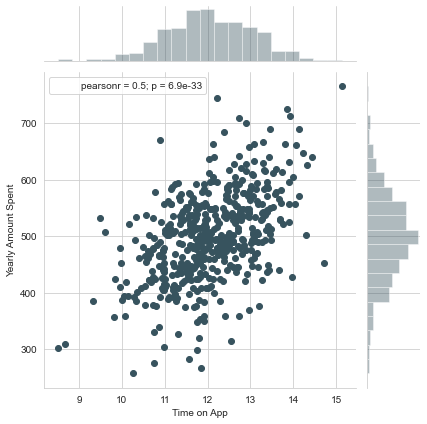

In [10]:
jointplot2 = sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=df, kind='scatter')
jointplot2.annotate(scipy.stats.pearsonr)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

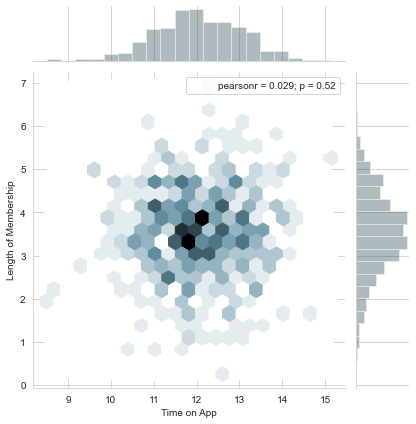

In [11]:
jointplot2 = sns.jointplot(x='Time on App', y='Length of Membership',data=df, kind='hex')
jointplot2.annotate(scipy.stats.pearsonr)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

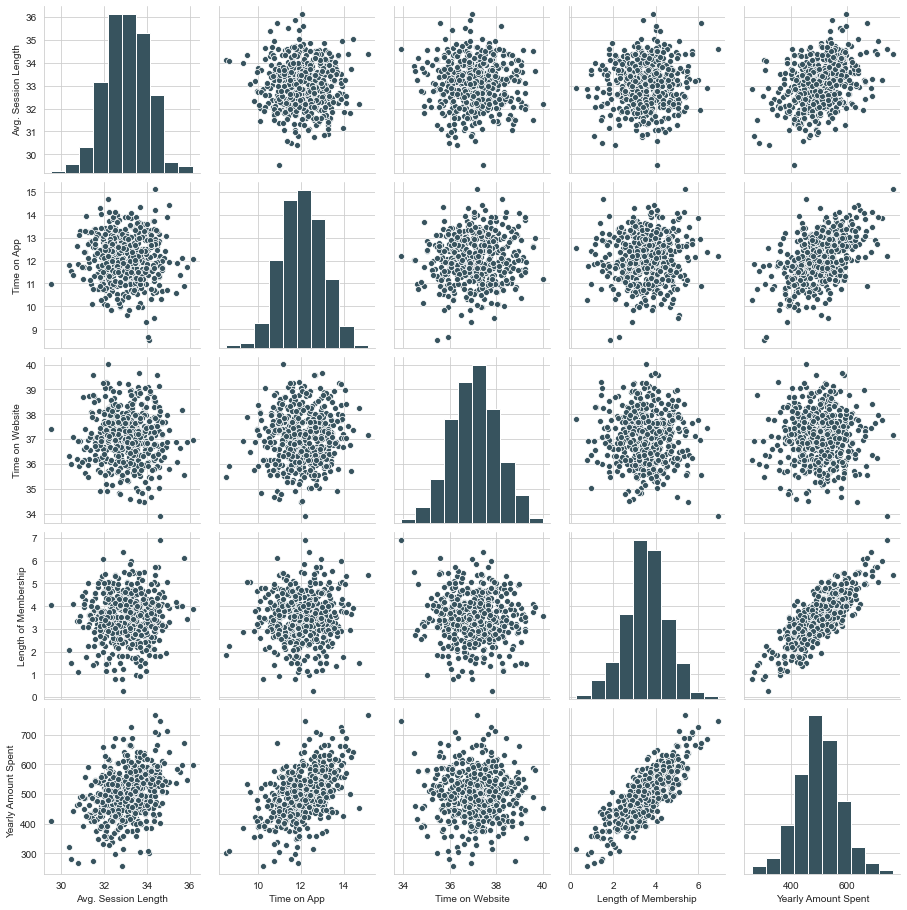

In [12]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

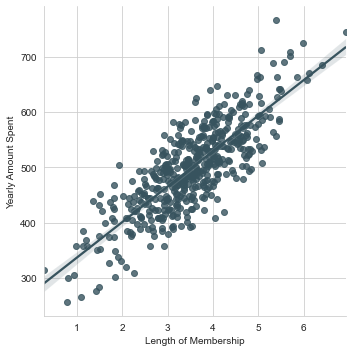

In [13]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

## Training and Testing Data

Split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [14]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

## Training the Model

Train the model on the training data!

** Import LinearRegression from sklearn.linear_model **

In [17]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [18]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [19]:
lm.fit(x_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Evaluate its performance by predicting off the test values.

** Use lm.predict() to predict off the X_test set of the data.**

In [21]:
predict = lm.predict(x_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y values')

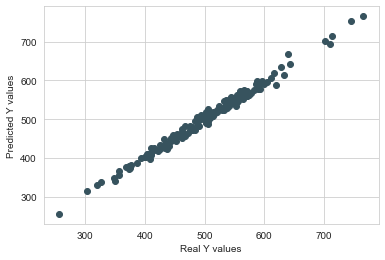

In [22]:
plt.scatter(y_test, predict)
plt.xlabel('Real Y values')
plt.ylabel('Predicted Y values')

## Evaluating the Model

Evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [23]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predict)
mse = metrics.mean_squared_error(y_test, predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))

print("MAE: {0}\nMSE: {1}\nRMSE: {2}".format(mae, mse, rmse))

MAE: 7.22814865343082
MSE: 79.81305165097419
RMSE: 8.93381506697862


## Residuals

Analyze the model and fit. Explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<AxesSubplot:xlabel='Yearly Amount Spent'>

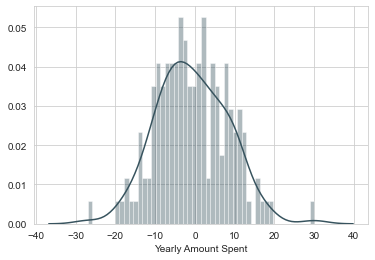

In [24]:
residual = y_test - predict
sns.distplot(residual,bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [25]:
pd.DataFrame(data=lm.coef_, index=x.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

The variable that indicates the most substantial increase on Yearly Amount Spent is the Length of Membership (1 unit increase in it is associated with 61 dollars spent yearly), while Time on Website does not increase much the spent money (only 0.19 cents).

**Do you think the company should focus more on their mobile app or on their website?**

The time spent on app is better related to the money spent, so focus on mobile app
